# Pandas Breakout Questions

To get some hands on experience with `pandas` we will be working with the somewhat morose dataset looking at all the mass shooting events that occured in 2015 (`./data/mass_shootings_2015.csv`)

NOTE: There are many ways to accomplish a task in the `pandas` package and thus these solutions are just a way to show you one or two approaches.

In [1]:
import pandas as pd

## 1. Reading in the Dataframe

First things first, we must read in our dataset!
Turn to your neighbor and figure out how to read this data into a Dataframe.  Once you have it read in, take a look at the columns and look at some summary statistics.

In [2]:
df = pd.read_csv('./data/mass_shootings_2015.csv')

In [3]:
df.head()

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,"December 31, 2015",Louisiana,New Orleans,1900 block of Amelia Street,0,5,NaN
1,"December 27, 2015",Tennessee,Jackson,North Parkway,0,4,NaN
2,"December 26, 2015",Pennsylvania,Philadelphia,4210 Macalester St,0,4,NaN
3,"December 25, 2015",Florida,Jacksonville,Franklin and Odessa,0,4,NaN
4,"December 25, 2015",Alabama,Mobile,785 Schillinger Rd S,0,4,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 7 columns):
Incident Date     330 non-null object
State             330 non-null object
City Or County    330 non-null object
Address           327 non-null object
# Killed          330 non-null int64
# Injured         330 non-null int64
Operations        0 non-null float64
dtypes: float64(1), int64(2), object(4)
memory usage: 18.1+ KB


In [5]:
df.describe()

/Users/ewellinger/anaconda3/envs/py2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,# Killed,# Injured,Operations
count,330.000000,330.000000,0.0
mean,1.112121,3.990909,NaN
std,1.792293,2.218308,NaN
min,0.000000,0.000000,NaN
25%,0.000000,3.000000,NaN
50%,1.000000,4.000000,NaN
75%,1.000000,5.000000,NaN
max,16.000000,19.000000,NaN


## 2. Clean Column Names

The first thing I always do when reading in a Datafram is clean up our column names!  Personally I view spaces, special characters, and capitals in column names as no-no's.  Granted this isn't a hard and fast rule but we have already seen cases where having spaces in column names causes issues.

With your neighbor, clean the columns names of this Dataframe!

In [6]:
df.columns

Index([u'Incident Date', u'State', u'City Or County', u'Address', u'# Killed',
       u'# Injured', u'Operations'],
      dtype='object')

In [7]:
cols = df.columns.tolist()
cols = [col.lower().replace('#', 'num').replace(' ', '_') for col in cols]
df.columns = cols
df.columns

Index([u'incident_date', u'state', u'city_or_county', u'address',
       u'num_killed', u'num_injured', u'operations'],
      dtype='object')

Maybe I want to also rename `'incident_date'` to just `'date'`, I can do this like so...

In [10]:
df.rename(columns={'incident_date': 'date'})
df.columns

Index([u'incident_date', u'state', u'city_or_county', u'address',
       u'num_killed', u'num_injured', u'operations'],
      dtype='object')

In [11]:
df.rename(columns={'incident_date': 'date'}, inplace=True)
df.columns

Index([u'date', u'state', u'city_or_county', u'address', u'num_killed',
       u'num_injured', u'operations'],
      dtype='object')

## 3. Cast the `date` column as a datetime object

We can see from our initial look at this data that the `date` column is actually an object (basically a string).  Let's alter this column to make it an actual date!

HINT: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html

In [13]:
df['date'] = pd.to_datetime(df['date'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 7 columns):
date              330 non-null datetime64[ns]
state             330 non-null object
city_or_county    330 non-null object
address           327 non-null object
num_killed        330 non-null int64
num_injured       330 non-null int64
operations        0 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 18.1+ KB


## 4. Make a new column `month`

Using that `date` column, create a new column called `month` that will have an `int` representing the ordinal month (e.g. `1` would indicate January)

HINT: Try pulling out a single date (use `.loc` for practice!) and extract the month.  Then try using the `.map` function to create a new column

In [15]:
x = df.loc[0, 'date']

In [16]:
x

Timestamp('2015-12-31 00:00:00')

In [17]:
x.month

12

In [19]:
df['month'] = df['date'].map(lambda x: x.month)

In [20]:
df.head()

,date,state,city_or_county,address,num_killed,num_injured,operations,month
0,2015-12-31,Louisiana,New Orleans,1900 block of Amelia Street,0,5,NaN,12
1,2015-12-27,Tennessee,Jackson,North Parkway,0,4,NaN,12
2,2015-12-26,Pennsylvania,Philadelphia,4210 Macalester St,0,4,NaN,12
3,2015-12-25,Florida,Jacksonville,Franklin and Odessa,0,4,NaN,12
4,2015-12-25,Alabama,Mobile,785 Schillinger Rd S,0,4,NaN,12


In [29]:
df['month'] = df['date'].dt.month

## 5. Drop the `operations` column

It looks like the operations column doesn't actually contain any useful information so let's drop that!

In [21]:
df.drop('operations', axis=1, inplace=True)
df.head()

,date,state,city_or_county,address,num_killed,num_injured,month
0,2015-12-31,Louisiana,New Orleans,1900 block of Amelia Street,0,5,12
1,2015-12-27,Tennessee,Jackson,North Parkway,0,4,12
2,2015-12-26,Pennsylvania,Philadelphia,4210 Macalester St,0,4,12
3,2015-12-25,Florida,Jacksonville,Franklin and Odessa,0,4,12
4,2015-12-25,Alabama,Mobile,785 Schillinger Rd S,0,4,12


## 6. How many incidents occured in each Month?

Let's look at how many incidents took place in each month.
HINT: (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)

In [24]:
df.groupby('month').count()['state']

month
1     23
2     16
3     20
4     19
5     35
6     36
7     41
8     39
9     34
10    20
11    27
12    20
Name: state, dtype: int64

In [25]:
df.groupby('month')['state'].count()

month
1     23
2     16
3     20
4     19
5     35
6     36
7     41
8     39
9     34
10    20
11    27
12    20
Name: state, dtype: int64

## 7. How many casualties occured in each Month?

Right now we have the number of people involved broken out into the number killed and the number injured.  Let's create a single column that indicates the number of casualties (i.e. the sum of killed and injured)

In [26]:
df['num_casualties'] = df['num_killed'] + df['num_injured']
df.head()

,date,state,city_or_county,address,num_killed,num_injured,month,num_casualties
0,2015-12-31,Louisiana,New Orleans,1900 block of Amelia Street,0,5,12,5
1,2015-12-27,Tennessee,Jackson,North Parkway,0,4,12,4
2,2015-12-26,Pennsylvania,Philadelphia,4210 Macalester St,0,4,12,4
3,2015-12-25,Florida,Jacksonville,Franklin and Odessa,0,4,12,4
4,2015-12-25,Alabama,Mobile,785 Schillinger Rd S,0,4,12,4


## 8. How many casualties occured by State?

Now that we have a casualties column, let's brake down the number of casualties by state.

In [27]:
df.groupby('state')['num_casualties'].sum()

state
Alabama                  17
Arizona                  29
Arkansas                 16
California              158
Colorado                 20
Connecticut              14
Delaware                  6
District of Columbia      9
Florida                 106
Georgia                  98
Illinois                117
Indiana                  49
Iowa                      9
Kansas                    4
Kentucky                 20
Louisiana                83
Maryland                 61
Massachusetts            24
Michigan                 54
Minnesota                24
Mississippi               9
Missouri                 51
Montana                   5
Nebraska                 17
Nevada                    4
New Jersey               36
New Mexico               11
New York                109
North Carolina           59
Ohio                     67
Oklahoma                 19
Oregon                   24
Pennsylvania             73
Rhode Island              4
South Carolina           51
South Dakota  

In [30]:
df.groupby('state')[['num_killed', 'num_injured', 'num_casualties']].sum()

,num_killed,num_injured,num_casualties
state,,,
Alabama,4,13,17
Arizona,15,14,29
Arkansas,2,14,16
California,38,120,158
Colorado,4,16,20
Connecticut,1,13,14
Delaware,0,6,6
District of Columbia,1,8,9
Florida,18,88,106


## 9. How many distinct City or Counties are represented?

Let's see how many distinct City or Counties are represented in this dataset.

In [40]:
df['city_or_county'].nunique()

205

In [41]:
df['city_or_county'].unique()

array(['New Orleans', 'Jackson', 'Philadelphia', 'Jacksonville', 'Mobile',
       'San Leandro', 'Wilmington', 'Miami (Goulds)',
       'Miami-dade (county)', 'Lovejoy (Brooklyn)', 'Los Angeles',
       'Huntington Beach', 'Savannah', 'Baltimore',
       'Pittsburgh (Mount Oliver)', 'Cincinnati (Fairmount)', 'Raceland',
       'Omaha', 'San Bernardino', 'Kankakee', 'Colorado Springs',
       'Sacramento', 'Horry (county)', 'Columbus', 'Minneapolis',
       'Brownsville', 'Seattle', 'Newburgh', 'North Charleston', 'Chicago',
       'Pittsburgh', 'Fresno', 'Cherokee (county)', 'Tennessee Colony',
       'Johnstown', 'Indianapolis', 'Warren', 'Des Moines', 'Denver',
       'Bakersfield', 'Pendleton', 'Houma', 'Fort Worth', 'Evansville',
       'Four Oaks', 'Phoenix', 'Washington', 'Bamberg', 'Nashville',
       'Calumet City', 'Fort Myers', 'Elkhart', 'Decatur', 'Memphis',
       'Charlotte', 'Peoria', 'Flagstaff', 'Roseburg',
       'Cincinnati (Evanston)', 'Dayton', 'Greenville', 'Kansa

In [42]:
len(df['city_or_county'].unique())

205

## 10. INDEXING!

You should be using `.loc`, `.iloc`, or `.ix` for all of these questions!

1. Return all rows occuring in Alabama
2. Return all shootings with more than 5 people killed
3. Return the address of shootings occuring on or after November 1st
4. Return the address and date of all shootings occuring in Louisiana or Florida with the casualty counts ranging from 6 to 10 (inclusive) 

In [43]:
# 1. Return all rows occuring in Alabama
df.loc[df['state'] == 'Alabama']

,date,state,city_or_county,address,num_killed,num_injured,month,num_casualties
4,2015-12-25,Alabama,Mobile,785 Schillinger Rd S,0,4,12,4
35,2015-11-16,Alabama,Cherokee (county),1400 block of County Road 664,3,1,11,4
229,2015-05-24,Alabama,Montgomery,Smiley Court,1,3,5,4
259,2015-04-18,Alabama,Montgomery,1800 block of Gibbs Court,0,5,4,5


In [44]:
# 2. Return all shootings with more than 5 people killed
df.loc[df['num_killed'] > 5]

,date,state,city_or_county,address,num_killed,num_injured,month,num_casualties
18,2015-12-02,California,San Bernardino,1365 South Waterman Avenue,16,19,12,35
66,2015-10-01,Oregon,Roseburg,1140 Umpqua College Rd,10,9,10,19
83,2015-09-17,South Dakota,Platte,36705 379th Street,6,0,9,6
128,2015-08-08,Texas,Houston,2211 Falling Oaks,8,0,8,8
159,2015-07-16,Tennessee,Chattanooga,4051 Amnicola Highway,6,2,7,8
195,2015-06-17,South Carolina,Charleston,110 Calhoun Street,9,0,6,9
235,2015-05-17,Texas,Waco,4671 S Jack Kultgen Expy,9,18,5,27
292,2015-02-26,Missouri,Tyrone,18279 Highway H,8,1,2,9


In [45]:
# 3. Return the address of shootings occuring on or after November 1st
df.loc[df['date'] >= '2015-11-01', 'address']

0                           1900 block of Amelia Street
1                                         North Parkway
2                                    4210 Macalester St
3                                   Franklin and Odessa
4                                  785 Schillinger Rd S
5                       14600 block of East 14th Street
6                                11th and Castle Street
7                          21630 Southwest 120th Avenue
8     Northeast Seventh Avenue and Northeast 166th S...
9                                      307 Jefferson St
10                                5550 S. Flower Street
11                          17000 block of Keelson Lane
12                                      Whitaker Street
13                    5100 block of Park Heights Avenue
14                       200 Block of  Brownsville Road
15                       2300 block of Baltimore Avenue
16                                        Market Street
17                 North 108th Street and Milita

In [51]:
# 4. Return the address and date of all shootings occuring in Louisiana or Florida 
#    with the casualty counts ranging from 6 to 10 (inclusive) 
df.loc[(df['state'].isin(['Louisiana', 'Florida'])) & (df['num_casualties'] >= 6) & \
       (df['num_casualties'] <= 10), ['date', 'address']]

,date,address
86,2015-09-13,1910 South Pine Avenue
172,2015-07-05,3500 block of Hearne Avenue
271,2015-03-27,5312 Thomas Drive


## 11. Sort by Date and reset index

Let's reorder our Dataframe based on the date and reset our index to reflect this.

NOTE: Don't use `df.sort()` as this method is deprecated!  Instead you should be using `df.sort_values()`

In [55]:
df.sort_values(by='date', inplace=True)
df.head()

,date,state,city_or_county,address,num_killed,num_injured,month,num_casualties
329,2015-01-01,Tennessee,Memphis,Interstate 240 and Poplar Avenue,0,5,1,5
328,2015-01-02,Georgia,Savannah,500 block of W. 54th Street,1,4,1,5
326,2015-01-04,Virginia,Roanoke,3634 Shenandoah Ave NW,2,4,1,6
327,2015-01-04,Texas,Dallas,2000 block of Ben Hur St.,3,1,1,4
325,2015-01-06,Florida,Miami,1300 block of NW 62nd Street,1,3,1,4


In [56]:
df.reset_index(drop=True, inplace=True)
df.head()

,date,state,city_or_county,address,num_killed,num_injured,month,num_casualties
0,2015-01-01,Tennessee,Memphis,Interstate 240 and Poplar Avenue,0,5,1,5
1,2015-01-02,Georgia,Savannah,500 block of W. 54th Street,1,4,1,5
2,2015-01-04,Virginia,Roanoke,3634 Shenandoah Ave NW,2,4,1,6
3,2015-01-04,Texas,Dallas,2000 block of Ben Hur St.,3,1,1,4
4,2015-01-06,Florida,Miami,1300 block of NW 62nd Street,1,3,1,4


## EXTRA CREDIT:  Create a graph showing the weekly frequency of shootings
HINT: Set the index as the date and refer to http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html

In [59]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

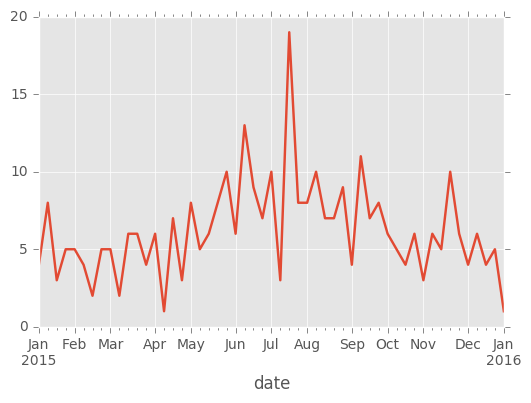

In [60]:
ts = pd.Series([1], index=df['date']).resample('W').sum()
ts.plot()

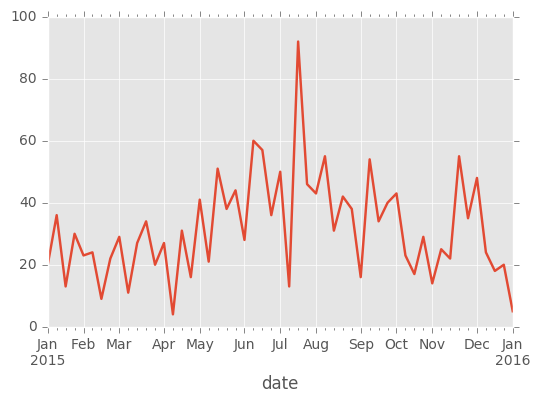

In [62]:
df.set_index('date').resample('W').sum()['num_casualties'].plot()